In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
import random
import numpy as np
import math
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [21]:
df2 = pd.read_excel("F:\ROMA_LOB_LOD.xlsx", sheet_name=2)
print(df2.shape)
df2.head(10)

(72, 8)


,Result.no,Day,Lot,Sample,rep,Blank_S/G,Blank_Conc,Rank
0,1,1,1,Bovine,1,1.195652,1.01,9
1,2,1,1,Goat,1,1.241082,1.32,18
2,3,1,1,Horse,1,1.183984,0.93,6
3,4,1,1,CalF,1,1.047848,0.17,-23
4,5,1,1,10% BSA,1,1.331099,1.96,30
5,6,1,1,SD,1,1.242113,1.32,19
6,7,1,1,Bovine,2,1.168667,0.84,-1
7,8,1,1,Goat,2,1.136390,0.64,-12
8,9,1,1,Horse,2,1.163678,0.81,-3
9,10,1,1,CalF,2,1.152574,0.74,-8


In [3]:
# blank_random = [random.random() for i in range(1,61)]
# rep = [i for i in range(1,61)]
# df2 = pd.DataFrame({'rep': rep, 'Blank_Conc' : blank_random})
# df2.head(3)

In [4]:
# df2=df1.rename(columns={'Unnamed: 1' : 'rep'}).drop(columns=['Unnamed: 0']).set_index('rep')

<AxesSubplot:xlabel='Blank_Conc', ylabel='Count'>

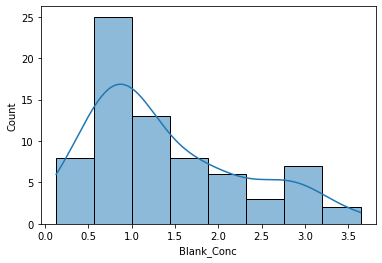

In [22]:
sns.histplot(data=df2, x='Blank_Conc', kde = True)

In [23]:
# 정규성 검정, 귀무가설: 정규성이다. 대립가설: 정규성 아니다.
p_val=stats.normaltest(df2['Blank_Conc'])[1]
p_val

0.02144458970721707

In [7]:
# print(len(df2['rep']))
# print(np.mean(df2['Blank']))
# print(np.std(df2['Blank']))

In [24]:
df3 = df2.sort_values(by= 'Blank_Conc')

### LOB
 1. two reagent lot
 2. one instrument system
 3. Tree days
 4. Four blank sample -> LOB
 5. Four low measurand sample (positive) -> LOD
 6. Two replicates per sample
 7. 60 total blank (low sample) replicates per reagent , 

#### 실수에서 정수부분 소수 부분 분리하는 함수 marh.modf
a = 1.2345
math.modf(a)[0]

In [102]:
df3['rank_position'] = df3['Blank_Conc'].rank(method='dense')
df4=df3.drop('rank_position', axis=1).reset_index()
# df4=df3[['Blank_Conc', 'rank_position']].loc[(df3['rank_position'] == 30)]
df4

,rank_position,Result.no,Day,Lot,Sample,rep,Blank_S/G,Blank_Conc,Rank
0,1.0,68,3,2,Goat,2,1.055922,0.13,0
1,2.0,4,1,1,CalF,1,1.047848,0.17,-23
2,3.0,56,3,1,Goat,2,1.055922,0.20,2
3,4.0,13,1,2,Bovine,1,1.069275,0.25,-21
4,5.0,58,3,1,CalF,2,1.091319,0.38,4
...,...,...,...,...,...,...,...,...,...
67,59.0,16,1,2,CalF,1,1.316926,2.94,43
68,60.0,47,2,2,10% BSA,2,1.320789,2.99,44
69,61.0,41,2,2,10% BSA,1,1.327636,3.07,45
70,62.0,17,1,2,10% BSA,1,1.351686,3.35,46


In [103]:
# LOB ,a=bate = type
# K= Sample 종류 식을 생각해보지
B = len(df2['rep'])  # Total result of blank samples
M=df4['Blank_Conc'].mean()
SD=df4['Blank_Conc'].std()
if p_val < 0.05:
    R_P =  (0.5+B*0.95)
    if type(R_P) == float:
        f=math.modf(R_P)[0]
        n=math.modf(R_P)[1]
        LoB = df4['Blank_Conc'][n-1]+f*(df4['Blank_Conc'][n-1]-df4['Blank_Conc'][n-2])
        print('LOB는 %s 입니다.' %round(LoB,3))
else:
    c = (1.645 / (1-(1/(4*(B-6)))))
    LoB = M + c*SD
    print('LOB는 %s 입니다.' %round(LoB,3))
        
#         df4=df3[['Blank', 'rank_position']].loc[(df3['rank_position'] == round(rank_LoB))]
#         result = df4['rank_position'].tolist()[0]
#         print(df4)

LOB는 2.985 입니다.


In [112]:
R_P

68.89999999999999

In [12]:
# LOD 5 day, 5 sample, 최소 sample lot day 합쳐서 40 반복

# randam_LOD = [random.uniform(1,5) for i in range(1,201)]
# rep_LOD = [i for i in range(1,201)]
# df5 = pd.DataFrame({'rep':rep_LOD, 'Low_sample':randam_LOD})
# df5.head(10)

In [115]:
LOD_raw = pd.read_excel("F:\ROMA_LOB_LOD.xlsx", sheet_name=3)
lot1 = (LOD_raw['Lot'] == 1)
lot2 =(LOD_raw['Lot'] == 2)
cond1 = (LOD_raw['Sample'] == 'L1')
cond2 = (LOD_raw['Sample'] == 'L2')
cond3 = (LOD_raw['Sample'] == 'L3')
cond4 = (LOD_raw['Sample'] == 'L4')
cond5 = (LOD_raw['Sample'] == 'L5')
cond6 = (LOD_raw['Sample'] == 'L6')

lot1_L1 = LOD_raw.loc[lot1&cond1]
lot1_L2 = LOD_raw.loc[lot1&cond2]
lot1_L3 = LOD_raw.loc[lot1&cond3]
lot1_L4 = LOD_raw.loc[lot1&cond4]
lot1_L5 = LOD_raw.loc[lot1&cond5]
lot1_L6 = LOD_raw.loc[lot1&cond6]

lot2_L1 = LOD_raw.loc[lot2&cond1]
lot2_L2 = LOD_raw.loc[lot2&cond2]
lot2_L3 = LOD_raw.loc[lot2&cond3]
lot2_L4 = LOD_raw.loc[lot2&cond4]
lot2_L5 = LOD_raw.loc[lot2&cond5]
lot2_L6 = LOD_raw.loc[lot2&cond6]

SD1_1=lot1_L1['LOW_Conc'].std()
SD1_2=lot1_L2['LOW_Conc'].std()
SD1_3=lot1_L3['LOW_Conc'].std()
SD1_4=lot1_L4['LOW_Conc'].std()
SD1_5=lot1_L5['LOW_Conc'].std()
SD1_6=lot1_L6['LOW_Conc'].std()

SD2_1=lot2_L1['LOW_Conc'].std()
SD2_2=lot2_L2['LOW_Conc'].std()
SD2_3=lot2_L3['LOW_Conc'].std()
SD2_4=lot2_L4['LOW_Conc'].std()
SD2_5=lot2_L5['LOW_Conc'].std()
SD2_6=lot2_L6['LOW_Conc'].std()

LOD_SD = pd.DataFrame({'LOT1':[SD1_1,SD1_2,SD1_3,SD1_4,SD1_5,SD1_6], 'LOT2' : [SD2_1,SD2_2,SD2_3,SD2_4,SD2_5,SD2_6]})
# LOD_raw.loc(cond1)
LOD_SD

,LOT1,LOT2
0,2.086956,3.755655
1,0.548805,6.599487
2,0.900431,1.860925
3,0.565995,0.814807
4,2.291302,1.136194
5,1.086278,2.236619


In [116]:
lot2_L6

,Result.no,Day,Lot,Sample,Sample_conc,rep,LOW_S/G,LOW_Conc
17,18,1,2,L6,2.9,1,1.580890,6.18
23,24,1,2,L6,2.9,2,1.065837,0.22
41,42,2,2,L6,2.9,1,1.574501,6.10
47,48,2,2,L6,2.9,2,1.312708,2.89
65,66,3,2,L6,2.9,1,1.450883,4.56
71,72,3,2,L6,2.9,2,1.416360,4.13


<AxesSubplot:xlabel='LOW_Conc', ylabel='Count'>

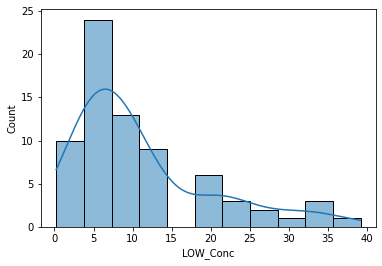

In [117]:
# 정규성 확인
sns.histplot(data=LOD_raw, x='LOW_Conc', kde=True)

In [119]:
# 정규성 검정 : 귀무-정규성을 갖는다

p_low_sample = stats.normaltest(LOD_raw['LOW_Conc'])
p_low_sample[1]

1.9953572821283364e-05

In [107]:
# L : total number, J : Low sample numder
L=(len(LOD_raw)+1)
J=LOD_raw['Sample'].nunique()
N=LOD_raw['Sample'].value_counts()[0]

LOT1_SDL= math.sqrt(np.sum((N-1)*LOD_SD**2)[0]/(N-1)*J)
LOT2_SDL= math.sqrt(np.sum((N-1)*LOD_SD**2)[1]/(N-1)*J)
LOT1_SDL
LOT2_SDL

17.51145196721277

In [114]:
N

8

In [19]:
LOD_raw
LOD_SD
c = (1.645/(1-(1/(4*(L-N)))))
LoD1 = LoB + c*LOT1_SDL
LoD2 = LoB + c*LOT2_SDL

print('LoD 값은 %s 입니다.' %round(max([LoD1,LoD2]),3))

LoD 값은 32.022 입니다.


In [20]:
LoD1

15.193021679724815